# Epidemic
 is the rapid spread of disease to a large number of hosts in a given population within a short period of time.

# Getting Data
This dataset provides a unique resource for researchers and data scientists interested in the global dynamics of the COVID-19 pandemic. It focuses on the impact of different SARS-CoV-2 variants and mutations on the duration of local epidemics. By combining variant information with epidemiological data, this dataset allows for a comprehensive analysis of factors influencing the trajectory of the pandemic.


- Country: The country where the variant was detected.
- first_seq: Date of the first sequence detection for the variant.
- num_seqs: Number of sequences detected for the variant.
- last_seq: Date of the last sequence detection for the variant.
- variant: Name of the SARS-CoV-2 variant or mutation.
- censure_date: Date of right censoring for an epidemic.
- duration: Duration of the epidemic in days.
- censored: A boolean variable indicating whether the epidemic was censored.
- mortality_rate: Estimated mortality rate for the variant.
- growth_rate: A variable reflecting the rate of spread of the infection.
- contamination_rate: Percentage of countries where the variant was detected.

In [72]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from traitlets import Bool

# Download latest version
path = kagglehub.dataset_download("lumierebatalong/covid-19-variants-survival-data")
path += "/surv_variants.csv"

print("Path to dataset files:", path)

Path to dataset files: /home/franio/.cache/kagglehub/datasets/lumierebatalong/covid-19-variants-survival-data/versions/1/surv_variants.csv


In [73]:
data = pd.read_csv(path)
data.dropna(inplace = True)
data

,Country,first_seq,num_seqs,last_seq,variant,censure_date,duration,censored,mortality_rate,total_cases,total_deaths,growth_rate
0,China,2019-10-22,3,2020-06-03,S.Q677,2020-06-21,225,True,0.052983,18259.460123,967.435583,16447.430706
1,USA,2020-03-03,26022,2021-11-19,S.Q677,2020-11-01,626,False,0.016111,256577.596234,4133.841031,84748.745876
2,Brazil,2020-03-09,1553,2021-11-12,S.Q677,2020-11-07,613,False,0.027846,101550.140466,2827.764288,42356.907426
3,Australia,2020-03-20,88,2021-11-14,S.Q677,2020-11-18,604,False,0.009905,1402.239579,13.889752,1227.122500
4,Sweden,2020-03-20,810,2021-11-19,S.Q677,2020-11-18,609,False,0.012711,1659.148728,21.089425,2521.042925
...,...,...,...,...,...,...,...,...,...,...,...,...
4106,Trinidad and Tobago,2021-08-03,111,2021-10-19,21J.Delta,2022-04-03,77,True,0.029648,2108.573673,62.515014,196.332060
4107,Mali,2021-08-10,2,2021-08-11,21J.Delta,2022-04-10,1,True,0.036421,136.390698,4.967442,10.000000
4108,Kazakhstan,2021-08-17,88,2021-08-19,21J.Delta,2022-04-17,2,True,0.014838,52244.958678,775.206612,7722.500000
4110,Guyana,2021-09-06,18,2021-09-08,21J.Delta,2022-05-07,2,True,0.024429,3855.168000,94.176000,131.000000


# Data Exploration

## Countries by quantity of pandemics

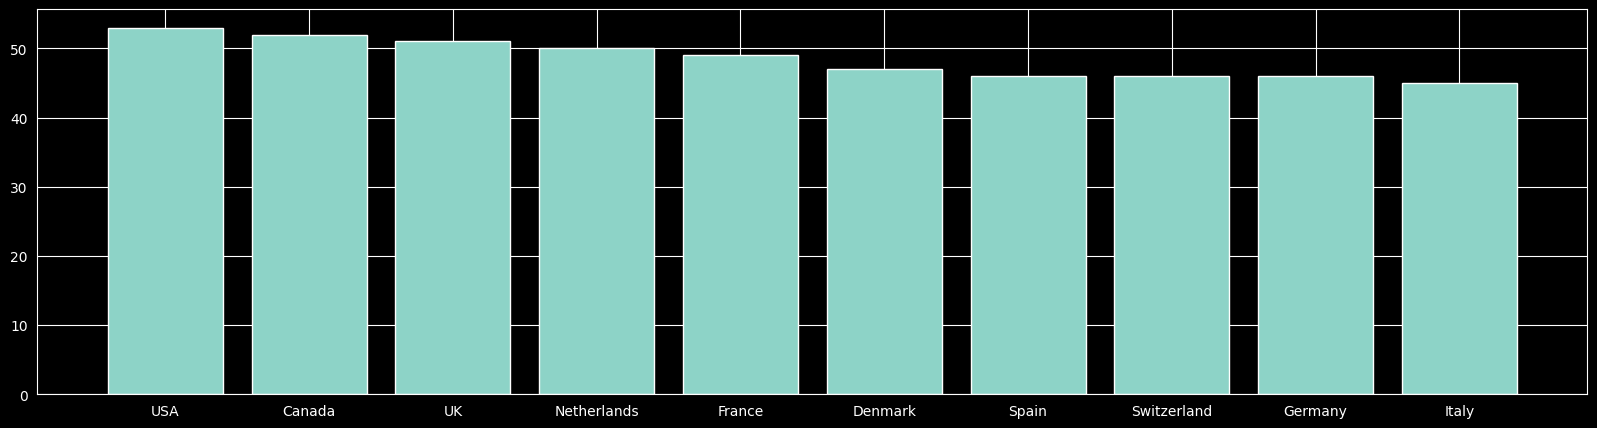

,Country,Pandemic_count
0,Afghanistan,10
1,Albania,10
2,Algeria,12
3,Andorra,14
4,Angola,26
...,...,...
166,Uzbekistan,5
167,Venezuela,13
168,Vietnam,13
169,Zambia,16


In [115]:
countries = np.unique(data['Country'])

df_cp = pd.DataFrame(
    {
        'Country' : countries,
        'Pandemic_count':  [data[data['Country'] == c].count()['Country'] for c in countries]
    }
)

top_10 = df_cp.sort_values(by='Pandemic_count', ascending=False).iloc[:10]

fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(top_10['Country'], top_10['Pandemic_count'])
plt.show()

df_cp

# Covid variant and mean mortality rate

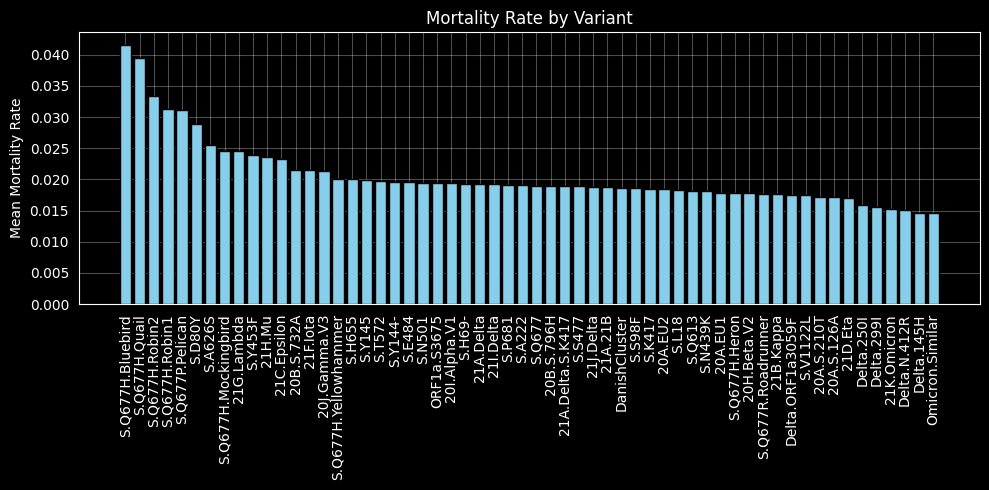

,variant,mortality_rate
42,S.Q677H.Bluebird,0.041513
45,S.Q677H.Quail,0.039448
47,S.Q677H.Robin2,0.033315
46,S.Q677H.Robin1,0.031305
49,S.Q677P.Pelican,0.031088
31,S.D80Y,0.028824
30,S.A626S,0.025500
44,S.Q677H.Mockingbird,0.024541
16,21G.Lambda,0.024485
57,S.Y453F,0.023994


In [122]:
variants = np.unique(data['variant'])
df_mr = pd.DataFrame({
    'variant' : variants,
    'mortality_rate': [data[data['variant'] == v]['mortality_rate'].mean() for v in variants]
})


df_mr = df_mr.sort_values(by='mortality_rate', ascending=False)


fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_mr['variant'], df_mr['mortality_rate'], color='skyblue', edgecolor='black')
ax.grid(alpha=0.3)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Mean Mortality Rate')
ax.set_title('Mortality Rate by Variant')

plt.tight_layout()
plt.show()

df_mr

# Survival Analysis:
1. How do different SARS-CoV-2 variants influence the duration of local epidemics?
2. Which factors (mortality, R0, etc.) are most strongly associated with shorter or longer epidemic durations?
3. Does the type of variant/mutation (mutation,S, Omicron, Delta, Other) have a significant impact on epidemic duration?
4. Is there a geographical pattern to the duration of epidemics?

## How do different SARS-CoV-2 variants influence the duration of local epidemics?
## Does the type of variant/mutation (mutation,S, Omicron, Delta, Other) have a significant impact on epidemic duration?

For this questions we will stratify the data by covid variant and analyze a kaplan-meier survival curves


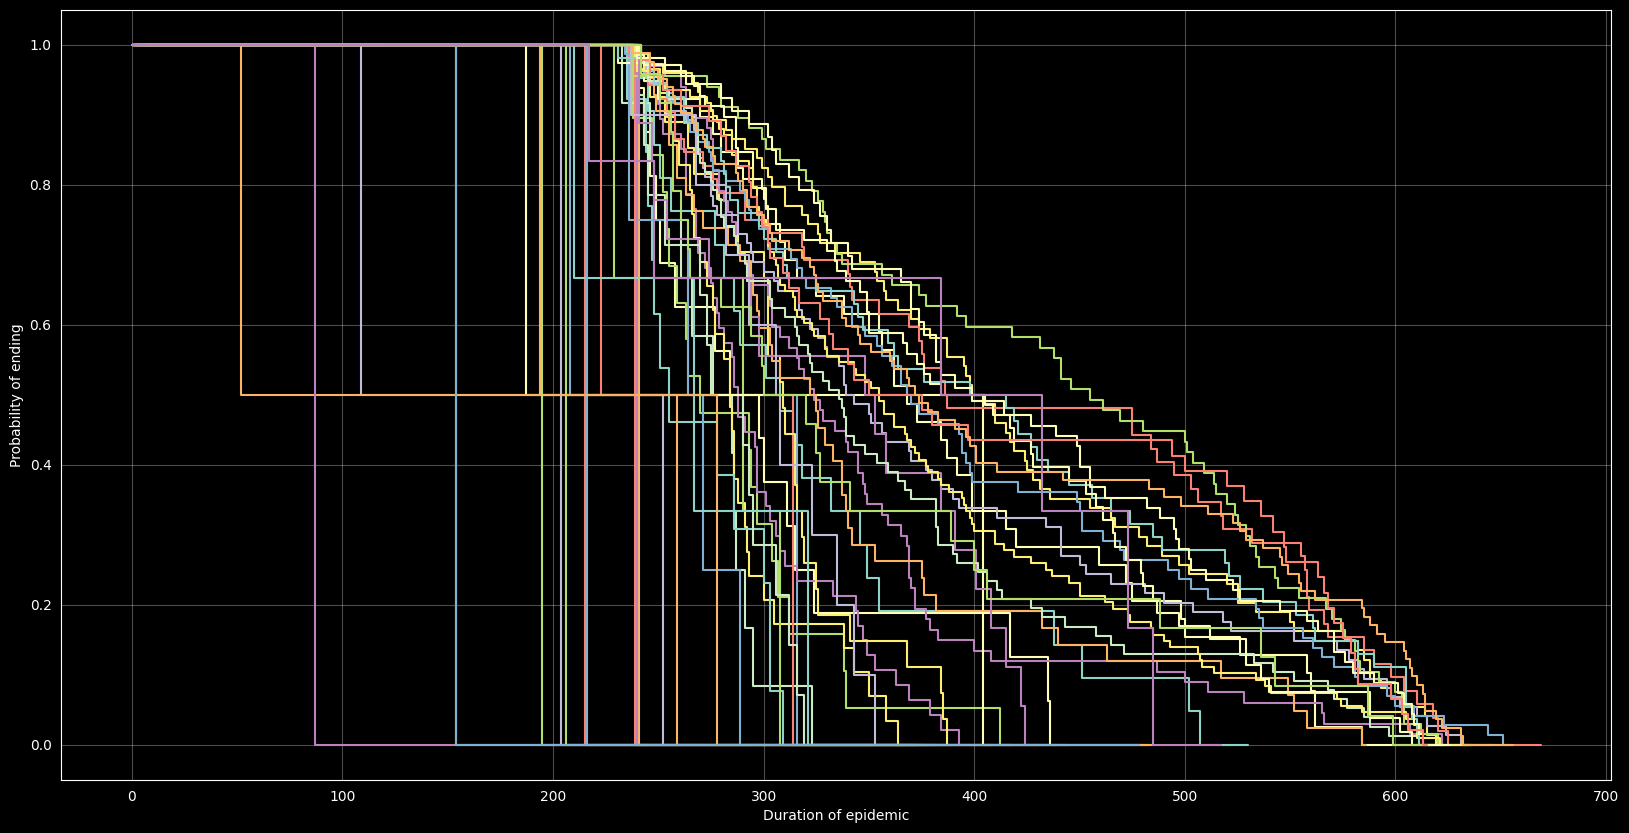

,variant,Maximum_duration_of_pandemic
0,20A.EU1,530
1,20A.EU2,483
2,20A.S.126A,219
3,20A.S.210T,480
4,20B.S.732A,384
5,20B.S.796H,245
6,20H.Beta.V2,435
7,20I.Alpha.V1,405
8,20J.Gamma.V3,373
9,21A.21B,381


In [134]:
from sksurv.nonparametric import kaplan_meier_estimator


fig, ax = plt.subplots(figsize=(20, 10))


duration = []
for v in variants:
    sample = data[data['variant'] == v]

    time, prob_surv, conf_int = kaplan_meier_estimator(
    ~sample['censored'], sample['duration'], conf_type='log-log',  conf_level=0.95)

    duration.append(time[-1])
    ax.step(time, prob_surv, label=v)


variant_time_df = pd.DataFrame(
    {
        'variant' : variants,
        'Maximum_duration_of_pandemic': duration
    }
)

ax.grid(alpha=0.3)
ax.set_ylabel('Probability of ending')
ax.set_xlabel("Duration of epidemic")
plt.show()

variant_time_df

## For 5 longest epidemics

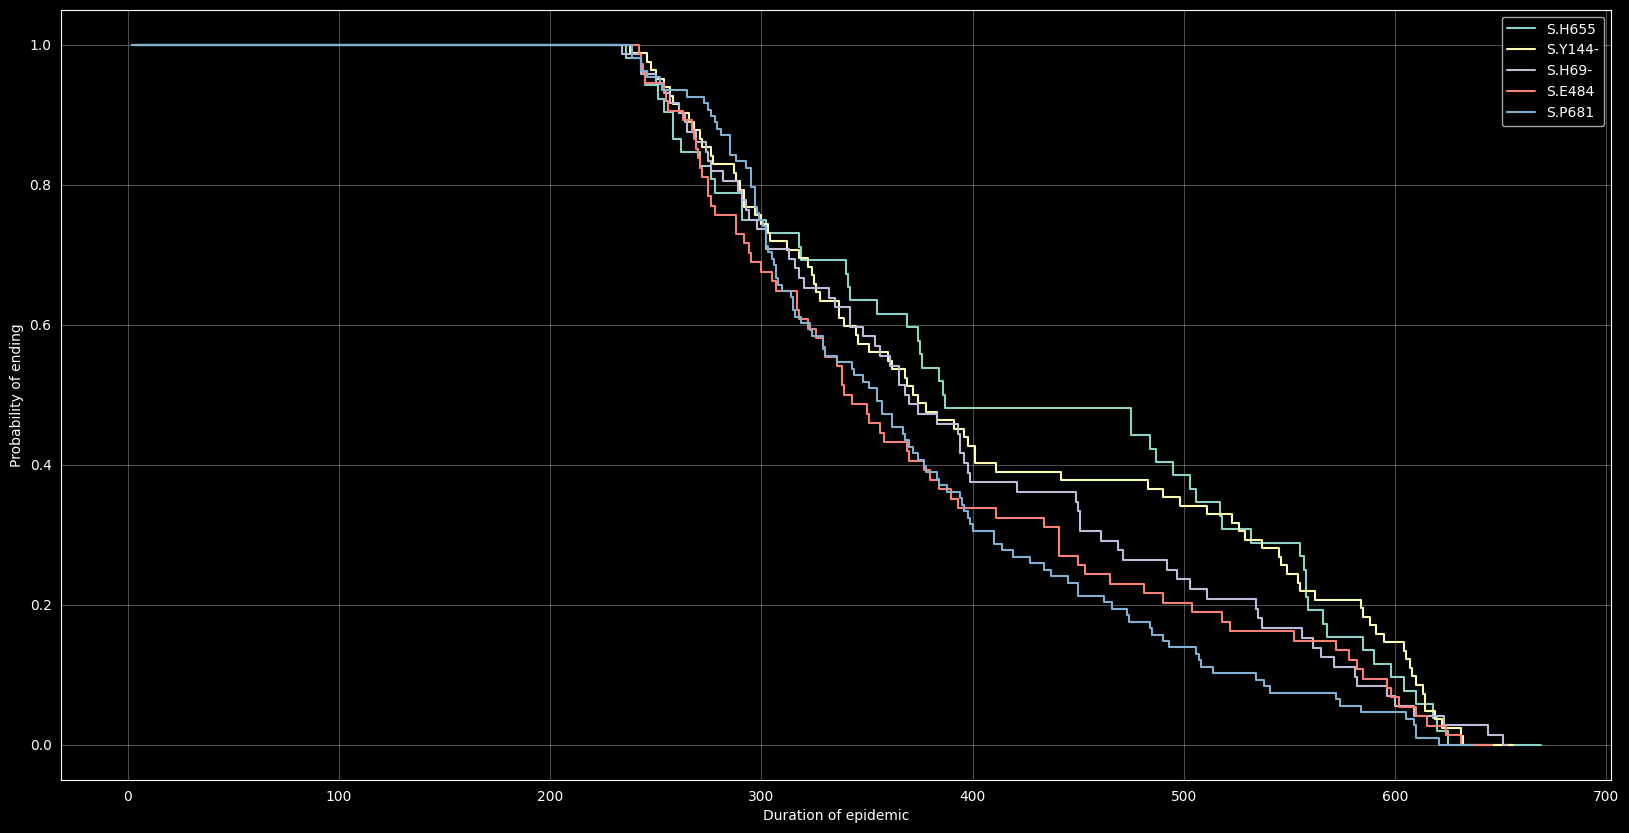

In [142]:
top_5_v = variant_time_df.sort_values(by='Maximum_duration_of_pandemic', ascending=False).iloc[:5]['variant']

fig, ax = plt.subplots(figsize=(20, 10))
for v in top_5_v:
    sample = data[data['variant'] == v]

    time, prob_surv, conf_int = kaplan_meier_estimator(
    ~sample['censored'], sample['duration'], conf_type='log-log',  conf_level=0.95)
    ax.step(time, prob_surv, label=v)

ax.grid(alpha=0.3)
ax.set_ylabel('Probability of ending')
ax.set_xlabel("Duration of epidemic")
plt.legend()
plt.show()

## Top 5 shortest

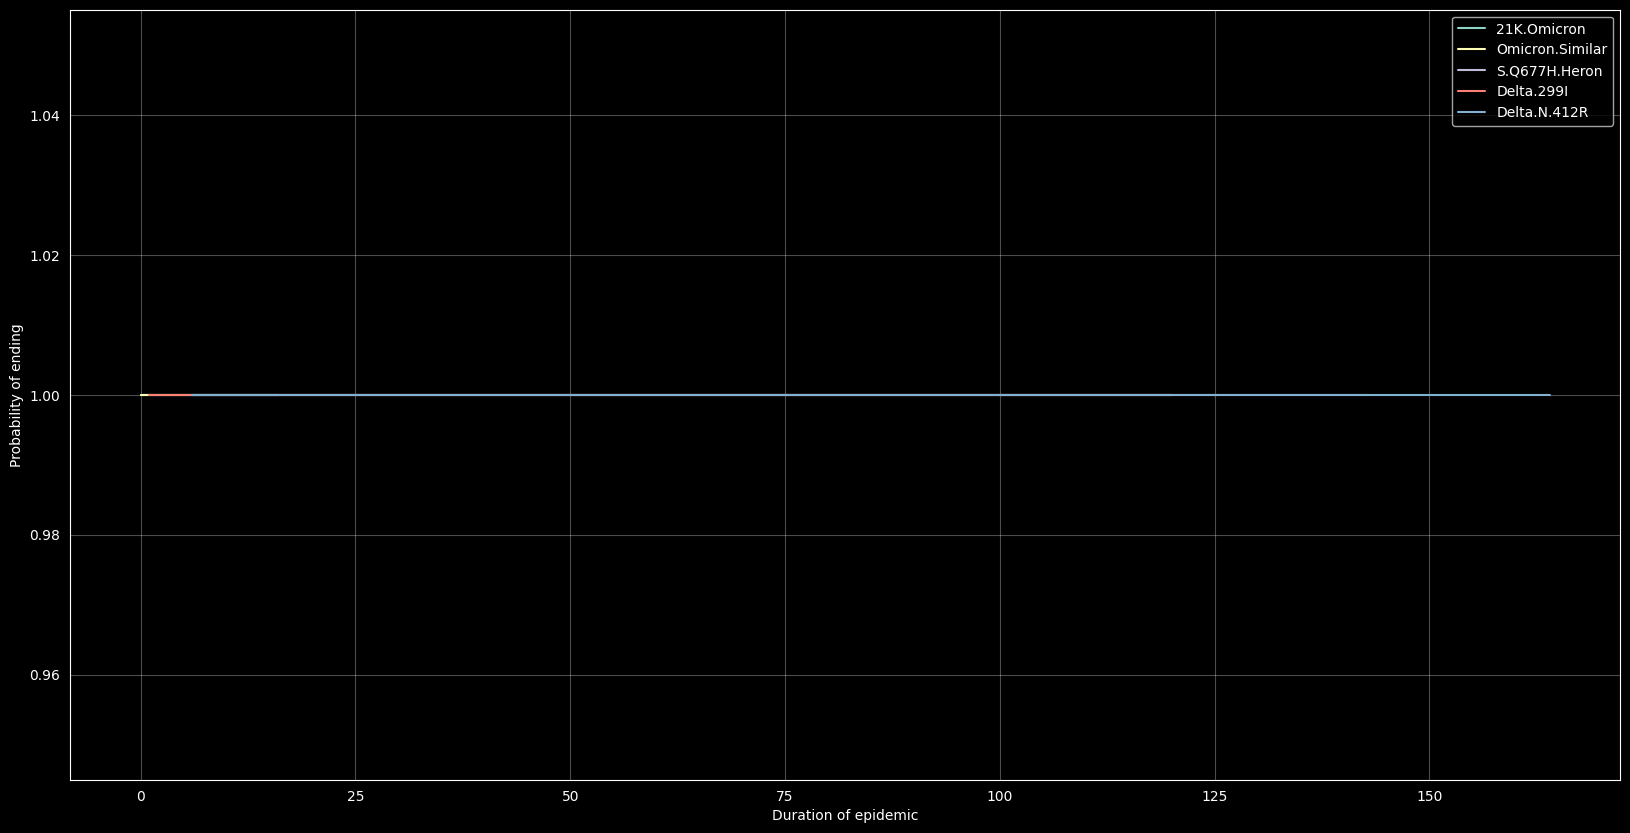

20        21K.Omicron
28    Omicron.Similar
43      S.Q677H.Heron
24         Delta.299I
25       Delta.N.412R
Name: variant, dtype: object

In [148]:
top_5_v = variant_time_df.sort_values(by='Maximum_duration_of_pandemic', ascending=True).iloc[:5]['variant']

fig, ax = plt.subplots(figsize=(20, 10))
for v in top_5_v:
    sample = data[data['variant'] == v]

    time, prob_surv, conf_int = kaplan_meier_estimator(
    ~sample['censored'], sample['duration'], conf_type='log-log',  conf_level=0.95)
    ax.step(time, prob_surv, label=v)

ax.grid(alpha=0.3)
ax.set_ylabel('Probability of ending')
ax.set_xlabel("Duration of epidemic")
plt.legend()
plt.show()
top_5_v

## Which factors (mortality, R0, etc.) are most strongly associated with shorter or longer epidemic durations?


### Data Preparation

In [230]:
X = data[['mortality_rate', 'total_cases', 'growth_rate', 'variant']]
X = pd.get_dummies(X)
dt = [('status', '?'), ('time', '<f8')]
y = np.array(list(zip(~data['censored'], data['duration'])), dtype=dt)

X

,mortality_rate,total_cases,growth_rate,variant_20A.EU1,variant_20A.EU2,variant_20A.S.126A,variant_20A.S.210T,variant_20B.S.732A,variant_20B.S.796H,variant_20H.Beta.V2,...,variant_S.Q677H.Yellowhammer,variant_S.Q677P.Pelican,variant_S.Q677R.Roadrunner,variant_S.S477,variant_S.S98F,variant_S.T572,variant_S.V1122L,variant_S.Y144-,variant_S.Y145,variant_S.Y453F
0,0.052983,18259.460123,16447.430706,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.016111,256577.596234,84748.745876,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.027846,101550.140466,42356.907426,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.009905,1402.239579,1227.122500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.012711,1659.148728,2521.042925,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,0.029648,2108.573673,196.332060,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4107,0.036421,136.390698,10.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4108,0.014838,52244.958678,7722.500000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4110,0.024429,3855.168000,131.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [225]:
from sksurv.tree import ExtraSurvivalTree

estimator = ExtraSurvivalTree()
estimator.fit(X,y)

,splitter,'random'
,max_depth,None
,min_samples_split,6
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,low_memory,False


# Model Results

In [226]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = np.zeros(5)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    estimator.fit(X_train, y_train)
    scores[i] = estimator.score(X_test, y_test)

print(f"Concordance indices per fold: {scores}")
print(f"Mean C-index: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Concordance indices per fold: [0.60095518 0.61471309 0.66155937 0.62502589 0.63780147]
Mean C-index: 0.628 (+/- 0.041)


## Feature Importance
For numerical data, and covid variants

In [229]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    estimator, X, y, n_repeats=10, random_state=0, n_jobs=-1
)

def_perm_importance = pd.DataFrame({
    'feature': X.columns,
    'importances_mean': result['importances_mean'],
    'importances_std': result['importances_std']
})

def_perm_importance

,feature,importances_mean,importances_std
0,mortality_rate,0.066324,0.004394
1,total_cases,0.046872,0.003911
2,growth_rate,0.140845,0.007949
3,variant_20A.EU1,0.004664,0.001462
4,variant_20A.EU2,0.002645,0.001118
...,...,...,...
56,variant_S.T572,0.004642,0.001010
57,variant_S.V1122L,0.000000,0.000000
58,variant_S.Y144-,0.007650,0.001229
59,variant_S.Y145,0.009426,0.001171


# Best Predictive Power
- growth_rate
- mortality_rate
- total_cases
- variant_20I.Alpha.V1



# 4. Is there a geographical pattern to the duration of epidemics?
To check this we can train cox model and check output for each conuntry.

No it doesn't

In [263]:
## DATA
X = data[['mortality_rate', 'total_cases', 'growth_rate', 'Country']]
X = pd.get_dummies(X)
dt = [('status', '?'), ('time', '<f8')]
y = np.array(list(zip(~data['censored'], data['duration'])), dtype=dt)

X

,mortality_rate,total_cases,growth_rate,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,...,Country_USA,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Zambia,Country_Zimbabwe
0,0.052983,18259.460123,16447.430706,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.016111,256577.596234,84748.745876,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.027846,101550.140466,42356.907426,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.009905,1402.239579,1227.122500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.012711,1659.148728,2521.042925,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,0.029648,2108.573673,196.332060,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4107,0.036421,136.390698,10.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4108,0.014838,52244.958678,7722.500000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4110,0.024429,3855.168000,131.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [264]:
from sksurv.linear_model import CoxnetSurvivalAnalysis
liner_est = CoxnetSurvivalAnalysis(fit_baseline_model=True)
liner_est.fit(X, y)

,n_alphas,100
,alphas,None
,alpha_min_ratio,'auto'
,l1_ratio,0.5
,penalty_factor,None
,normalize,False
,copy_X,True
,tol,1e-07
,max_iter,100000
,verbose,False
,fit_baseline_model,True


## Model Results

In [265]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = np.zeros(5)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    estimator.fit(X_train, y_train)
    scores[i] = estimator.score(X_test, y_test)

print(f"Concordance indices per fold: {scores}")
print(f"Mean C-index: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Concordance indices per fold: [0.62149472 0.64820535 0.6348258  0.65725866 0.6707008 ]
Mean C-index: 0.646 (+/- 0.034)


# Prediction for each country

In [296]:
def predict_country_survival(country_name, plot:bool = False):
    global liner_est, countries

    obs = pd.DataFrame(
        {
            'mortality_rate': [X['mortality_rate'].mean()],
            'total_cases': [X['total_cases'].mean()],
            'growth_rate': [X['growth_rate'].mean()],
        }
    )

    dummy_c = {}
    for c in countries:
        dummy_c[f'Country_{c}'] = 1 if c == country_name else 0

    dummy_df = pd.DataFrame([dummy_c], index=obs.index)
    obs = pd.concat([obs, dummy_df], axis=1)

    # print(X.shape, obs.shape)
    # print(obs)
    surv_funcs = liner_est.predict_survival_function(obs)


    if plot:
        plt.figure(figsize=(8, 5))
        for fn in surv_funcs:
            plt.step(fn.x, fn.y, where="post", label=country_name)

        plt.ylim(0, 1.05)
        plt.xlabel("Time")
        plt.ylabel("Epidemic Lasting Probability")
        plt.title(f"Predicted Survival Function: {country_name}")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.show()

    fn = surv_funcs[0]
    median_time = fn.x[fn.y <= 0.5][0]
    return median_time

result = []
for c in countries:
    result.append(predict_country_survival(country_name=c))

df_county_dur = pd.DataFrame({
    'Country': countries,
    'Epidemic Time (median)': result
})

df_county_dur

,Country,Epidemic Time (median)
0,Afghanistan,347.0
1,Albania,347.0
2,Algeria,347.0
3,Andorra,347.0
4,Angola,347.0
...,...,...
166,Uzbekistan,347.0
167,Venezuela,347.0
168,Vietnam,347.0
169,Zambia,347.0


# Can we identify clusters of variants/regions with similar epidemic patterns?
Best way to do that is analyze KP curves in stratified by country data. We can difference between different continents

In [309]:
def get_continent(country_name):
    """
    Returns the continent for a given country name based on the provided dataset.
    """
    # Create the lookup dictionary (optimized for O(1) speed)
    # print(country_name)
    country_to_continent = {
        'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe',
        'Angola': 'Africa', 'Antigua and Barbuda': 'North America', 'Argentina': 'South America',
        'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia',
        'Bahamas': 'North America', 'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Barbados': 'North America',
        'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
        'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
        'Brazil': 'South America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa',
        'Burundi': 'Africa', 'Cabo Verde': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa',
        'Canada': 'North America', 'Central African Republic': 'Africa', 'Chile': 'South America',
        'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa',
        'Congo (Kinshasa)': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe',
        'Cyprus': 'Europe', 'Czech Republic': 'Europe', "Côte d'Ivoire": 'Africa', 'Denmark': 'Europe',
        'Djibouti': 'Africa', 'Dominica': 'North America', 'Dominican Republic': 'North America',
        'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America',
        'Equatorial Guinea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa', 'Ethiopia': 'Africa',
        'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa',
        'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe',
        'Grenada': 'North America', 'Guatemala': 'North America', 'Guinea': 'Africa',
        'Guinea-Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America',
        'Honduras': 'North America', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia',
        'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia',
        'Italy': 'Europe', 'Jamaica': 'North America', 'Japan': 'Asia', 'Jordan': 'Asia',
        'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kosovo': 'Europe', 'Kuwait': 'Asia', 'Laos': 'Asia',
        'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa', 'Liberia': 'Africa',
        'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
        'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia',
        'Mali': 'Africa', 'Malta': 'Europe', 'Mauritius': 'Africa', 'Mexico': 'North America',
        'Moldova': 'Europe', 'Monaco': 'Europe', 'Mongolia': 'Asia', 'Montenegro': 'Europe',
        'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Nepal': 'Asia',
        'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Niger': 'Africa', 'Nigeria': 'Africa',
        'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia',
        'Palestine': 'Asia', 'Panama': 'North America', 'Papua New Guinea': 'Oceania',
        'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
        'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe', 'Russia': 'Europe', 'Rwanda': 'Africa',
        'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
        'Saint Vincent and the Grenadines': 'North America', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa',
        'Serbia': 'Europe', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia',
        'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Solomon Islands': 'Oceania', 'Somalia': 'Africa',
        'South Africa': 'Africa', 'South Korea': 'Asia', 'South Sudan': 'Africa', 'Spain': 'Europe',
        'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe',
        'Switzerland': 'Europe', 'Taiwan': 'Asia', 'Thailand': 'Asia', 'Timor-Leste': 'Asia',
        'Togo': 'Africa', 'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia',
        'UK': 'Europe', 'USA': 'North America', 'Uganda': 'Africa', 'Ukraine': 'Europe',
        'United Arab Emirates': 'Asia', 'Uruguay': 'South America', 'Uzbekistan': 'Asia',
        'Venezuela': 'South America', 'Vietnam': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
    }

    return country_to_continent.get(country_name, "Unknown")

# Create a new Data Frame

In [313]:
data_c = pd.DataFrame(
    {
        'Country': data['Country'],
        'Continent': [get_continent(c) for c in data['Country']],
        'duration': data['duration'],
        'censored': data['censored'],
        'total_cases': data['total_cases'],
        'total_deaths': data['total_deaths'],
        'growth_rate': data['growth_rate'],

    }
)

data_c

,Country,Continent,duration,censored,total_cases,total_deaths,growth_rate
0,China,Asia,225,True,18259.460123,967.435583,16447.430706
1,USA,North America,626,False,256577.596234,4133.841031,84748.745876
2,Brazil,South America,613,False,101550.140466,2827.764288,42356.907426
3,Australia,Oceania,604,False,1402.239579,13.889752,1227.122500
4,Sweden,Europe,609,False,1659.148728,21.089425,2521.042925
...,...,...,...,...,...,...,...
4106,Trinidad and Tobago,North America,77,True,2108.573673,62.515014,196.332060
4107,Mali,Africa,1,True,136.390698,4.967442,10.000000
4108,Kazakhstan,Asia,2,True,52244.958678,775.206612,7722.500000
4110,Guyana,South America,2,True,3855.168000,94.176000,131.000000


## Stratify via continents

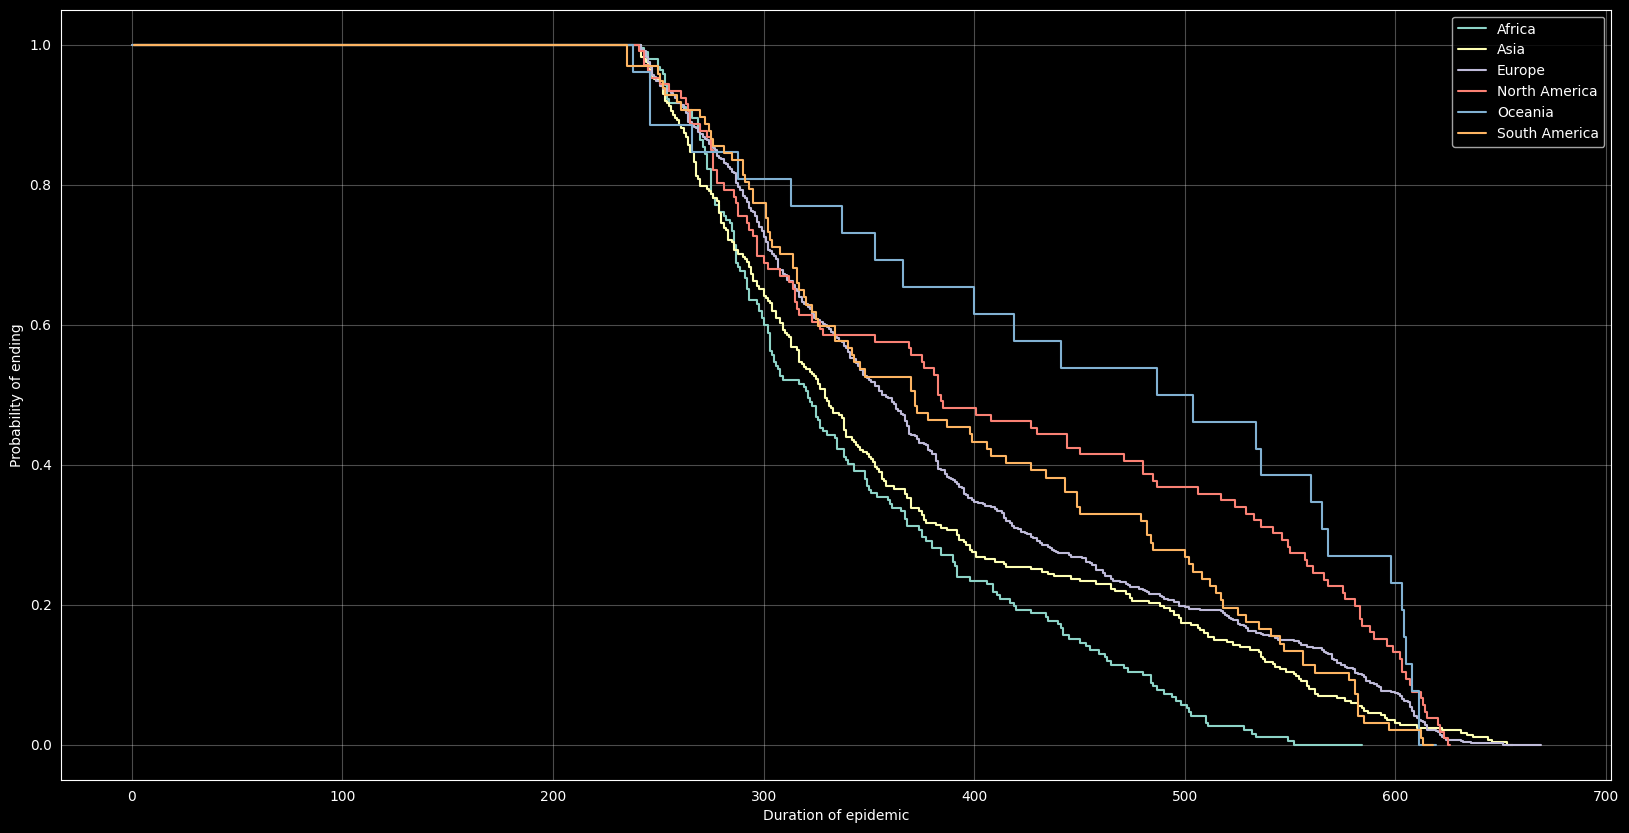

,Continent,Maximum_duration_of_pandemic
0,Africa,584
1,Asia,656
2,Europe,669
3,North America,626
4,Oceania,619
5,South America,618


In [317]:
Regions = np.unique(data_c['Continent'])
fig, ax = plt.subplots(figsize=(20, 10))

duration = []
for region in Regions:
    sample = data_c[data_c['Continent'] == region]

    time, prob_surv, conf_int = kaplan_meier_estimator(
    ~sample['censored'], sample['duration'], conf_type='log-log',  conf_level=0.95)

    duration.append(time[-1])
    ax.step(time, prob_surv, label=region)


variant_time_df = pd.DataFrame(
    {
        'Continent' : Regions,
        'Maximum_duration_of_pandemic': duration
    }
)

ax.grid(alpha=0.3)
ax.set_ylabel('Probability of ending')
ax.set_xlabel("Duration of epidemic")
plt.legend()
plt.show()

variant_time_df

## Summary
It is clear to sea that in Africa, Asia and Europe the epidemic tends to finish faster. The biggest differance is between africa and Oceania. That's make sense as is Africa is poorly communicated and big and Ocenia is relatively small (more over people are gathered in big cities mostly).

# Europ Analyzyz

In [323]:
import pandas as pd

def map_europe_regions(country):
    europe_regions = {
        # Northern Europe
        'Denmark': 'Northern Europe', 'Estonia': 'Northern Europe', 'Finland': 'Northern Europe',
        'Iceland': 'Northern Europe', 'Ireland': 'Northern Europe', 'Latvia': 'Northern Europe',
        'Lithuania': 'Northern Europe', 'Norway': 'Northern Europe', 'Sweden': 'Northern Europe',
        'UK': 'Northern Europe',

        # Southern Europe
        'Albania': 'Southern Europe', 'Bosnia and Herzegovina': 'Southern Europe',
        'Bulgaria': 'Southern Europe', 'Croatia': 'Southern Europe', 'Cyprus': 'Southern Europe',
        'Greece': 'Southern Europe', 'Italy': 'Southern Europe', 'Kosovo': 'Southern Europe',
        'Malta': 'Southern Europe', 'Montenegro': 'Southern Europe', 'North Macedonia': 'Southern Europe',
        'Portugal': 'Southern Europe', 'Romania': 'Southern Europe', 'Serbia': 'Southern Europe',
        'Slovenia': 'Southern Europe', 'Spain': 'Southern Europe',

        # Western & Central Europe
        'Andorra': 'Western Europe', 'Austria': 'Central Europe', 'Belgium': 'Western Europe',
        'Czech Republic': 'Central Europe', 'France': 'Western Europe', 'Germany': 'Central Europe',
        'Hungary': 'Central Europe', 'Liechtenstein': 'Western Europe', 'Luxembourg': 'Western Europe',
        'Monaco': 'Western Europe', 'Netherlands': 'Western Europe', 'Poland': 'Central Europe',
        'Slovakia': 'Central Europe', 'Switzerland': 'Central Europe',

        # Eastern Europe
        'Belarus': 'Eastern Europe', 'Moldova': 'Eastern Europe',
        'Russia': 'Eastern Europe', 'Ukraine': 'Eastern Europe'
    }
    return europe_regions.get(country, None)



EU_c = data_c[data_c['Continent'] == 'Europe']
data_e = pd.DataFrame(
    {
        'Country': EU_c['Country'],
        'Region': [map_europe_regions(c) for c in EU_c['Country']],
        'duration': EU_c['duration'],
        'censored': EU_c['censored'],
        'total_cases': EU_c['total_cases'],
        'total_deaths': EU_c['total_deaths'],
        'growth_rate': EU_c['growth_rate'],

    }
)

data_e

,Country,Region,duration,censored,total_cases,total_deaths,growth_rate
4,Sweden,Northern Europe,609,False,1659.148728,21.089425,2521.042925
5,Spain,Southern Europe,611,False,19008.576071,328.528593,9904.841293
6,UK,Northern Europe,608,False,211650.102470,3054.417780,219867.190258
7,Germany,Central Europe,601,False,17896.698205,339.440979,9198.318857
12,Romania,Southern Europe,571,False,2942.507460,86.214793,2836.032969
...,...,...,...,...,...,...,...
4074,Malta,Southern Europe,19,True,1608.311688,21.818182,12.731579
4082,Serbia,Southern Europe,100,True,72874.533333,635.304348,2154.394455
4088,Albania,Southern Europe,23,True,5727.229665,105.803828,19.365217
4089,Andorra,Western Europe,93,True,2489.232558,21.162791,11.677542


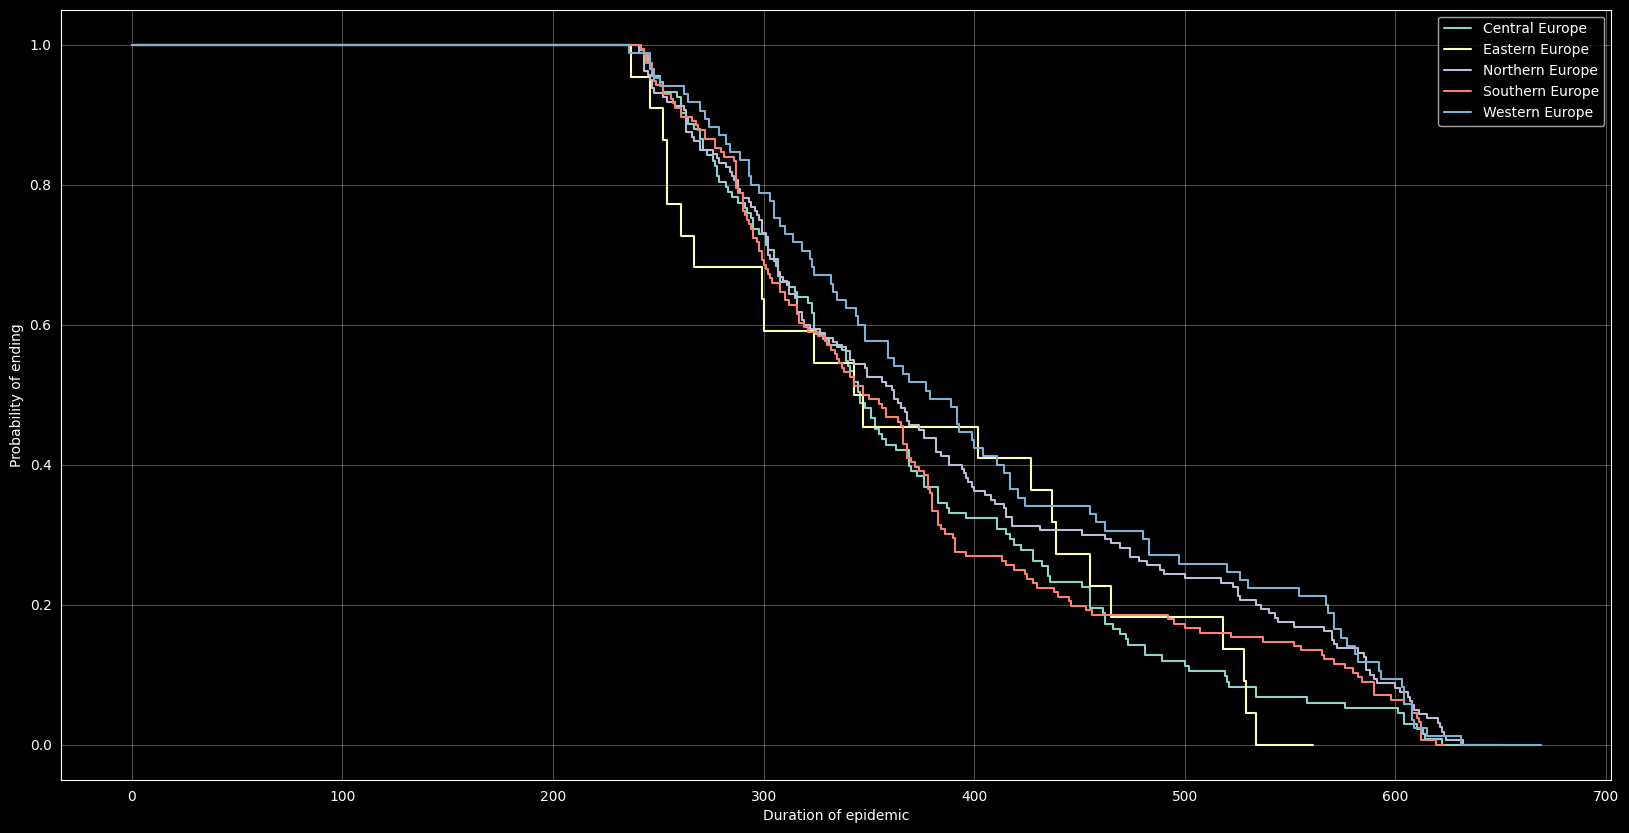

,Continent,Maximum_duration_of_pandemic
0,Central Europe,651
1,Eastern Europe,561
2,Northern Europe,636
3,Southern Europe,623
4,Western Europe,669


In [325]:
Regions = np.unique(data_e['Region'])
fig, ax = plt.subplots(figsize=(20, 10))

duration = []
for region in Regions:
    sample = data_e[data_e['Region'] == region]

    time, prob_surv, conf_int = kaplan_meier_estimator(
    ~sample['censored'], sample['duration'], conf_type='log-log',  conf_level=0.95)

    duration.append(time[-1])
    ax.step(time, prob_surv, label=region)


variant_time_df = pd.DataFrame(
    {
        'Continent' : Regions,
        'Maximum_duration_of_pandemic': duration
    }
)

ax.grid(alpha=0.3)
ax.set_ylabel('Probability of ending')
ax.set_xlabel("Duration of epidemic")
plt.legend()
plt.show()

variant_time_df

## Relusts
Not significant difference. The longest and shortest epidemic is Eastern and Western Europ.